https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/

<font size="5">**TimeDistributed Layer**<font>

<font size="3"> Long Short-Term Networks or LSTMs are a popular and powerful type of Recurrent Neural Network, or RNN.<font>

<font size="3">They can be quite difficult to configure and apply to arbitrary sequence prediction problems, even with well defined and “easy to use” interfaces like those provided in the Keras deep learning library in Python.<font>

<font size="3">One reason for this difficulty in Keras is the use of the TimeDistributed wrapper layer and the need for some LSTM layers to return sequences rather than single values.<font>

<font size="3">**Data preparation**<font>

In [1]:
import numpy as np
length = 5
seq = np.array([i/float(length) for i in range(length)])
print(seq)

[0.  0.2 0.4 0.6 0.8]


<font size="5">**One-to-One LSTM for Sequence Prediction**<font>

<font size="3"> The input-output pairs are as follows:<font>
<br> X,&emsp;&emsp;y
<br>0.0&emsp;&emsp;0.0
<br>0.2&emsp;&emsp;0.2
<br>0.4&emsp;&emsp;0.4
<br>0.6&emsp;&emsp;0.6
<br>0.8&emsp;&emsp;0.8

<font size="3">The input to LSTM must be 3D. Hence reshape seq from *[samples, timesteps]* into *[samples, timesteps, features]*.<font>

In [2]:
X = seq.reshape(5, 1, 1) #5samples, 1snapshot, 1feature
y = seq.reshape(5, 1)    #5samples, 1feature

# summarize the data
print('X:\n',X)
print('y:\n',y)

X:
 [[[0. ]]

 [[0.2]]

 [[0.4]]

 [[0.6]]

 [[0.8]]]
y:
 [[0. ]
 [0.2]
 [0.4]
 [0.6]
 [0.8]]


<font size="3">We will define the network model as having 1 input with 1 time step. The first hidden layer will be an LSTM with 5 units. The output layer with be a fully-connected layer with 1 output.<font>

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from NN import *
from keras.utils.vis_utils import plot_model

# define LSTM configuration
n_neurons = 5
n_batch = 5 # same as number of samples here.
n_epoch = 1000

# create LSTM
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(1, 1))) #(n_snapshots, n_features)
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
print(model.summary())

2021-10-12 13:07:14.605936: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-12 13:07:14.605955: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
None


2021-10-12 13:07:15.597402: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-12 13:07:15.597508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-10-12 13:07:15.597584: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-10-12 13:07:15.600041: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2021-10-12 13:07:15.600104: W tensorflow/stream_executor/platform/default/dso_loader

<font size="3">The number of parameters are calculated as in [here](https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model)<font>

In [4]:
# train LSTM
history = model.fit(X, y, epochs=n_epoch, batch_size=n_batch, verbose=0)
# evaluate
result = model.predict(X, batch_size=n_batch, verbose=0)
for value in result:
    print('%.1f' % value)

2021-10-12 13:07:16.011627: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


0.0
0.2
0.4
0.6
0.8


<font size="3">Here, when input is 0.2, output is also 0.2, following the one-to-one expectation. LSTM trained successfully.<font>
    
<br><font size="3">Now, Show the keys in history [which is loss in this case] and plot loss on training datasets.<font>

dict_keys(['loss'])


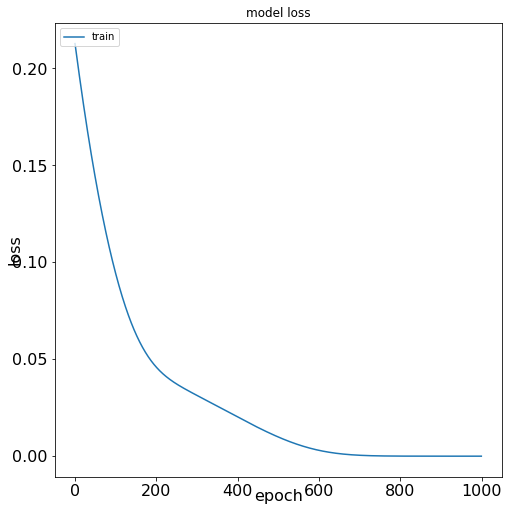

In [5]:
show(history)
plot(history, xy=('epoch', 'loss'), save=False, figname=None,figpath=None)

<font size="3">To show the following node graph, graphvia is needed by:
*sudo apt install graphviz*<font>

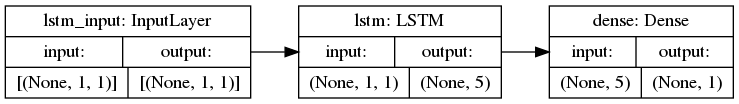

In [6]:
img_dir = './output/LSTM-one-to-one.png'
plot_model(model, to_file=img_dir, show_shapes=True, show_dtype=False,
           show_layer_names=True, rankdir="LR", expand_nested=False,
           dpi=96, layer_range=None,
          ) 
#rankdir="TB" = vertical or 'LR' = horizontal

<font size="5">**Many-to-One LSTM for Sequence Prediction (without  TimeDistributed)**<font>

<font size="3">The input to LSTM must be 3D. 
Reshape seq from [samples, timesteps] into [samples, timesteps, features].<font>

In [7]:
X = seq.reshape(1, 5, 1) #1samples, 5snapshot, 1feature
y = seq.reshape(1, 5)    #1samples, 5feature

# summarize the data
print('X:\n',X)
print('y:\n',y)

X:
 [[[0. ]
  [0.2]
  [0.4]
  [0.6]
  [0.8]]]
y:
 [[0.  0.2 0.4 0.6 0.8]]


<font size="3">We will define the network model as having 1 input with 5 snapshots. The first hidden layer will be an LSTM with 5 units. The output layer with be a fully-connected layer with 5 neurons.<font>

In [8]:
# define LSTM configuration
n_neurons = 5
n_batch = 1 # same as number of samples here.
n_epoch = 500

# create LSTM
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(5, 1))) #(n_snapshots, n_features)
model.add(Dense(5))
model.compile(loss='mse', optimizer='adam')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________
None


<font size="3">Next, we fit the model for only 500 epochs and a batch size of 1 for the single sample in the training dataset.<font>

In [9]:
# train LSTM
history = model.fit(X, y, epochs=n_epoch, batch_size=n_batch, verbose=0)
# evaluate
result = model.predict(X, batch_size=n_batch, verbose=0)
for value in result[0,:]:
	print('%.1f' % value)

0.0
0.2
0.4
0.6
0.8


dict_keys(['loss'])


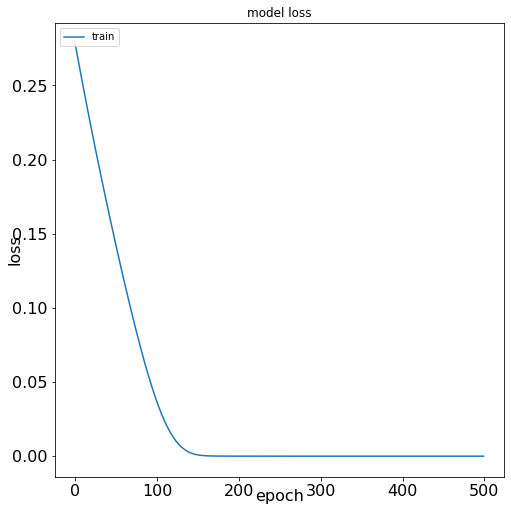

In [10]:
show(history)
plot(history, xy=('epoch', 'loss'), save=False, figname=None,figpath=None)

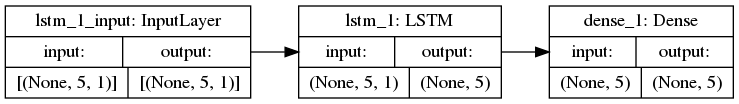

In [11]:
img_dir = './output/LSTM-many-to-one.png'
plot_model(model, to_file=img_dir, show_shapes=True, show_dtype=False,
           show_layer_names=True, rankdir="LR", expand_nested=False,
           dpi=96, layer_range=None,
          ) 
#rankdir="TB" = vertical or 'LR' = horizontal

<font size="5">**Many-to-Many LSTM for Sequence Prediction (with TimeDistributed)**<font>

<font size="3">The input to LSTM must be 3D. Reshape seq from [samples, timesteps] into [samples, timesteps, features].<font>

<font size="3">We can define the shape of the output as having 1 sample, 5 time steps, and 1 feature, just like the input sequence, as follows:<font>

In [12]:
n_snapshots = 5
X = seq.reshape(1, n_snapshots, 1) #1samples, 5snapshot, 1feature
y = seq.reshape(1, n_snapshots, 1) #1samples, 5snapshot, 1feature

<font size="3">We can define the LSTM hidden layer to return sequences rather than single values by setting the “return_sequences” argument to true.<font>

In [13]:
# define LSTM configuration
n_neurons = n_snapshots
n_batch = 1
n_epoch = 1000 #increased from 500 to 1000 to match the first one-to-one example
# create LSTM
model = Sequential()

<font size="3">Define the LSTM hidden layer to return sequences rather than single values by setting the “return_sequences” argument to true.<font>

In [14]:
model.add(LSTM(n_neurons, input_shape=(n_snapshots, 1), return_sequences=True)) # return_sequences=True (n_snapshots, n_features)

<font size="3">The single output value in the output layer is key. It highlights that we intend to output one time step from the sequence for each time step in the input. It just so happens that we will process 5 time steps of the input sequence at a time.<font>

In [15]:
from keras.layers import TimeDistributed
model.add(TimeDistributed(Dense(1))) # TimeDistributed is needed
model.compile(loss='mse', optimizer='adam')
print(model.summary())
# train LSTM
history = model.fit(X, y, epochs=n_epoch, batch_size=n_batch, verbose=0)
# evaluate
result = model.predict(X, batch_size=n_batch, verbose=0)
for value in result[0,:]:
    print('%.1f' % value)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 5)              140       
_________________________________________________________________
time_distributed (TimeDistri (None, 5, 1)              6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
None
0.0
0.2
0.4
0.6
0.8


dict_keys(['loss'])


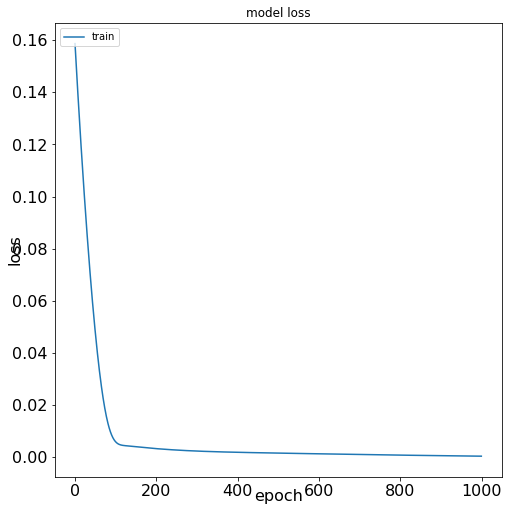

In [16]:
show(history)
plot(history, xy=('epoch', 'loss'), save=False, figname=None,figpath=None)

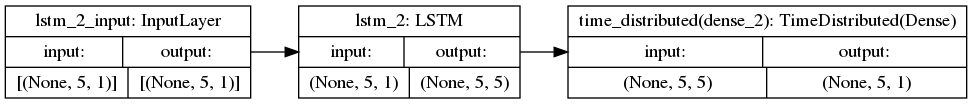

In [17]:
img_dir = './output/LSTM-many-to-many.png'
plot_model(model, to_file=img_dir, show_shapes=True, show_dtype=False,
           show_layer_names=True, rankdir="LR", expand_nested=False,
           dpi=96, layer_range=None,
          ) 
#rankdir="TB" = vertical or 'LR' = horizontal

<font size="5">**A Summary:**<font>

<font size="3">Basically, there’re three configurations for X (and thus y):<font>
1. (5,1,1) – 5 batchs, 1 time step, 1 feature/step – result shape (5,1)
2. (1,5,1) – 1 batch, 5 time steps, 1 feature/step – result shape (1,5)
3. (1,1,5) – 1 batch, 1 time step, 5 features/step

5samples, 1snapshot, 1feature ------------> 5samples, 1feature (5 batch)
1samples, 5snapshot, 1feature ------------> 1samples, 5feature (1 batch)
1samples, 5snapshot, 1feature ------------> 1samples, 5snapshot, 1feature, (1 batch)